**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Good luck on the next sprint! 

# Table of Contents

# Project description

Mobile carrier Megaline has found out that many of their subscribers use legacy plans.

They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

You have access to behavior data about subscribers who have already switched to the new plans.

For this classification task, you need to develop a model that will pick the right plan.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset

# Data description

Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:

- сalls - number of calls,
- minutes - total call duration in minutes,
- messages - number of text messages,
- mb_used - Internet traffic used in MB,
- is_ultra - plan for the current month (Ultra - 1, Smart - 0).

# import libraries


In [1]:
# update libraries
!pip install pandas -U
!pip install scikit-learn -U

     |████████████████████████████████| 11.7 MB 1.7 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'top_level.txt'
Consider using the `--user` option or check the permissions.



In [31]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix

In [32]:
# definitions
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
# delete error messages
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Open the data file and study the general information.

In [5]:
df = pd.read_csv("/datasets/users_behavior.csv", sep=",")

In [6]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,"19,915.42",0
1,85.00,516.75,56.00,"22,696.96",0
2,77.00,467.66,86.00,"21,060.45",0
3,106.00,745.53,81.00,"8,437.39",1
4,66.00,418.74,1.00,"14,502.75",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


# Check the data frame for missing values and duplicates

## checking for missing values

In [8]:
# list of all missing values in the Dataset - in total and %
report = df.isna().sum().to_frame()
report = report.rename(columns={0: "missing_values"})
report["%_of_total"] = (report["missing_values"] / df.shape[0] * 100).round(2)
report.sort_values(by="missing_values", ascending=False)

,missing_values,%_of_total
calls,0,0.00
minutes,0,0.00
messages,0,0.00
mb_used,0,0.00
is_ultra,0,0.00


No missing data

## checking for duplicates

In [9]:
# checking the data frame columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [10]:
df['calls'] = df['calls'].astype('int64')
df['messages'] = df['messages'].astype('int64')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected!

</div>

# Split the source data into a training set, a validation set, and a test set

I will use 60% for training, 20% for validation and 20% for the test

In [11]:
# First, we split to taking 60% of the data and 40%
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=12345)

In [12]:
# Then we split the temp to validate and test - each 20%
df_validate, df_test = train_test_split(
    df_temp, test_size=0.5, random_state=12345)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data split is reasonable!

</div>

# divide the data to feature and target

In [13]:
features_train = df_train.drop(['is_ultra'], axis=1)
features_validate = df_validate.drop(['is_ultra'], axis=1)
features_test = df_test.drop(['is_ultra'], axis=1)

In [14]:
target_train = df_train['is_ultra']
target_validate = df_validate['is_ultra']
target_test = df_test['is_ultra']

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

# Investigate the quality of different models by changing hyperparameters

**Decision Tree**

In [15]:
model_dt = DecisionTreeClassifier(random_state=12345,  max_depth=3)

In [16]:
model_dt.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=12345)

In [17]:
predictions_train = model_dt.predict(features_train)
predictions_validate = model_dt.predict(features_validate)

In [18]:
accuracy_dt = accuracy_score(target_validate, predictions_validate)
accuracy_dt

0.7853810264385692

**conclusion:** when running the model on hyperparameter max__depth = 3, the accuracy score of the model is 0.785

optimizing hyperparameters
We will try to change the hyperparameter max_depth from 1 to 10 to find out what gives the best accuracy score of the model.

In [19]:
for i in range(1, 11):
    model_dt = DecisionTreeClassifier(random_state=12345,  max_depth=i)
    model_dt.fit(features_train, target_train)
    predictions_validate = model_dt.predict(features_validate)
    accuracy_dt = accuracy_score(target_validate, predictions_validate)
    print(f'For max_depth = {i},\t accuracy is {accuracy_dt:.5f}')

For max_depth = 1,	 accuracy is 0.75428
For max_depth = 2,	 accuracy is 0.78227
For max_depth = 3,	 accuracy is 0.78538
For max_depth = 4,	 accuracy is 0.77916
For max_depth = 5,	 accuracy is 0.77916
For max_depth = 6,	 accuracy is 0.78383
For max_depth = 7,	 accuracy is 0.78227
For max_depth = 8,	 accuracy is 0.77916
For max_depth = 9,	 accuracy is 0.78227
For max_depth = 10,	 accuracy is 0.77449


**conclusion:** on checking the model on the validate data, the best accuracy score is max_depth = 3

**Random Forest**

In [20]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators=3)

In [21]:
model_rf.fit(features_train, target_train)

RandomForestClassifier(n_estimators=3, random_state=12345)

In [22]:
predictions_train = model_rf.predict(features_train)
predictions_validate = model_rf.predict(features_validate)

In [23]:
accuracy_rf = accuracy_score(target_validate, predictions_validate)
accuracy_rf

0.7387247278382582

**conclusion:** when running the model on hyperparameter n__estimators = 3, the accuracy score of the model is 0.7387

**optimizing hyperparameters**

We will try to change the hyperparameter n_estimators from 1 to 10 to find out what gives the best accuracy score of the model.

In [24]:
for i in range(1, 11):
    model_rf = RandomForestClassifier(random_state=12345, n_estimators=i)
    model_rf.fit(features_train, target_train)
    predictions_validate = model_rf.predict(features_validate)
    accuracy_rf = accuracy_score(target_validate, predictions_validate)
    print(f'For n_estimators = {i},\t accuracy is {accuracy_rf:.5f}')

For n_estimators = 1,	 accuracy is 0.71073
For n_estimators = 2,	 accuracy is 0.76361
For n_estimators = 3,	 accuracy is 0.73872
For n_estimators = 4,	 accuracy is 0.77138
For n_estimators = 5,	 accuracy is 0.74961
For n_estimators = 6,	 accuracy is 0.78072
For n_estimators = 7,	 accuracy is 0.76827
For n_estimators = 8,	 accuracy is 0.78227
For n_estimators = 9,	 accuracy is 0.77294
For n_estimators = 10,	 accuracy is 0.78538


**conclusion:** on checking the model on the validate data, the best accuracy score is n__estimators = 10

In [25]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators=10)
model_rf.fit(features_train, target_train)
predictions_test = model_rf.predict(features_test)
accuracy_rf = accuracy_score(target_test, predictions_test)
print(f'For n_estimators = 10 on the test data, accuracy is {accuracy_rf:.5f}')

For n_estimators = 10 on the test data, accuracy is 0.78072


**Logistic Regression**

In [35]:
model_lr = LogisticRegression(
    random_state=12345, solver='liblinear', max_iter=100)

In [36]:
model_lr.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [37]:
predictions_train = model_lr.predict(features_train)
predictions_validate = model_lr.predict(features_validate)

In [38]:
accuracy_lr = accuracy_score(target_validate, predictions_validate)
accuracy_lr

0.7091757387247278

**conclusion:** when running the model on hyperparameter solver=liblinear , the accuracy score of the model is 0.7091

**optimizing hyperparameters**

We will try to change the hyperparameter solver for every option to find out what gives the best accuracy score of the model.

In [30]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    model_lr = LogisticRegression(random_state=12345, solver=i)
    model_lr.fit(features_train, target_train)
    predictions_validate = model_lr.predict(features_validate)
    accuracy_lr = accuracy_score(target_validate, predictions_validate)
    print(f'For solver = {i},\t accuracy is {accuracy_lr:.5f}')

For solver = newton-cg,	 accuracy is 0.75583
For solver = lbfgs,	 accuracy is 0.71073
For solver = liblinear,	 accuracy is 0.70918
For solver = sag,	 accuracy is 0.70607
For solver = saga,	 accuracy is 0.70607


**conclusion:** on checking the model on the validate data, the best accuracy score is solver=newton-cg

In [40]:
model_lr = LogisticRegression(random_state=12345, solver='newton-cg')
model_lr.fit(features_train, target_train)
predictions_test = model_lr.predict(features_test)
accuracy_lr = accuracy_score(target_test, predictions_test)
print(f'For solver = "newton-cg",\t accuracy is {accuracy_lr:.5f}')

For solver = "newton-cg",	 accuracy is 0.73872


<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a couple of different models, did some hyperparameter tuning using the validation set and evaluated the final models on the test set

</div>

# Sanity check

compare the models to the dummy classifier by using different metrics and the confusion matrix

In [41]:
# making the dummy classifier
clf_dummy = DummyClassifier(random_state=12345)
clf_dummy.fit(features_train, target_train)
predictions_test = clf_dummy.predict(features_test)

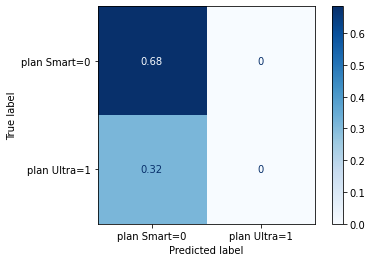

In [42]:
# for the test data
plot_confusion_matrix(estimator=clf_dummy, X=features_test, y_true=target_test,
                      normalize='all', cmap='Blues', display_labels=['plan Smart=0', 'plan Ultra=1'])

In [43]:
target_train.value_counts(normalize=True)
# plan for the current month (Ultra - 1, Smart - 0)

0   0.69
1   0.31
Name: is_ultra, dtype: float64

**conclusion:** the data is not balanced. The dummy classifier gives about 70% accuracy only because of the imbalance target data. For this project we will not deal with it but only mention that the accuracy score of every model will start with 70% and give better score from that

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent observation! 

</div>

# ploting confusion matrix to the three models

**Decision Tree confusion matrix**

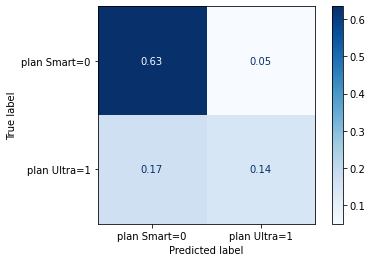

In [45]:
model_dt = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_dt.fit(features_train, target_train)
plot_confusion_matrix(estimator=model_dt, X=features_test, y_true=target_test,
                      normalize='all', cmap='Blues', display_labels=['plan Smart=0', 'plan Ultra=1'])

**Random Forest confusion matrix**

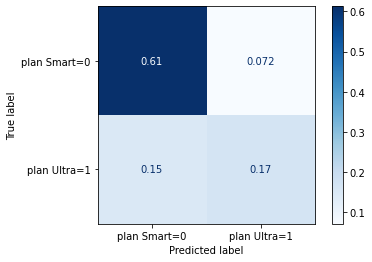

In [46]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators=10)
model_rf.fit(features_train, target_train)
plot_confusion_matrix(estimator=model_rf, X=features_test, y_true=target_test,
                      normalize='all', cmap='Blues', display_labels=['plan Smart=0', 'plan Ultra=1'])

**Logistic Regression confusion matrix**

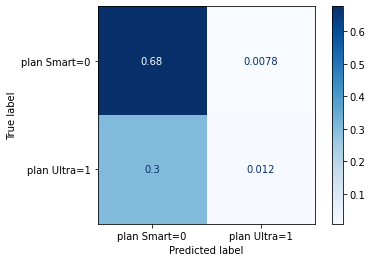

In [47]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
plot_confusion_matrix(estimator=model_lr, X=features_test, y_true=target_test,
                      normalize='all', cmap='Blues', display_labels=['plan Smart=0', 'plan Ultra=1'])

<div class="alert alert-success">
<b>Reviewer's comment</b>

Confusion matrix is a good tool for model diagnostics!

</div>

**conclusion**

This project is about training classification model. We have 2 options on the target: '0' and '1'. For selecting the best model, we checked three options: decision tree, random forest and Logistic Regression. To prepare the date, we checked it for duplicates and missing values, we changes the type of the data to appropriate types.

We split the data between train date, validate data and test data with the ratio 60%, 20% and 20% respectively. For every split we had feature data for the independent variables and target for the outcome. after running the model, we tried to optimize it by changing one hyperparameter and to fine out what setting returns the best accurate score.

**The major findings**

- The decision tree model
    - hyperparameter: max_depth. best value = 3
    - accuracy score on test data: 0.77916
- The random forest model
    - hyperparameter: n_estimators. best value = 10
    - accuracy score on test data: 0.78072
- The logistic regression model
    - hyperparameter: solver. best value = newton-cg
    - accuracy score on test data: 0.73872

The **random forest model** wins    

**Sanity check**

To establishing a baseline model that we can compare our model’s performance we checked the data in the dummy classifier and plot confusion matrix. On the dummy classifier, we could find 68% for plan smart('0') and null for plan ultra('1'). We, then, plot confusion matrix.
All three models could not predict the ultra plan ('1') correctly. The results are very close to the dummy classifier. This mean we cannot relay on any model.

To find out why the results came out incorrect we notice that the data is not balanced. About 70% for '0'. We need to address this problem to get better outcome for the models.


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Conclusions look good, although I would say that based on the confusion matrix, for example, random forest looks much better than dummy classfier

</div>